## Observations and Insights 

### Observations based on Analysis done below

1.When looking at the Final Tumor volume across the four drug regimens Capomulin, Ramicane, Infubinol, and Ceftamin, 
only Infubinol had an outlier.

2.The final tumor volumes were smaller for mice treated with Capomulin and Ramicane than mice treated with Infubinol 
and Ceftamin. 

3.The correlation factor between Mouse Weight and Average Tumor Volume for Capomulin is 0.84, which means there is a
strong correlation between those two factors. From the plot you can see that as mouse weight increases so does the 
average tumor volume.

4.In this study the sex of the mice uses were close, more analysis could be done to see if sex of the mice plays 
a factor in Final Tumor Volume at the end of the study.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata,study_results, how = "left")

# Display the data table for preview
mouse_study_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = mouse_study_complete["Mouse ID"].count()
mouse_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouseid_tp = mouse_study_complete[mouse_study_complete.duplicated(["Mouse ID","Timepoint"])]
duplicate_mouseid_tp


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseid = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] == "g989"]
duplicate_mouseid


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mouse_study_clean = mouse_study_complete.drop_duplicates("Mouse ID")
#mouse_study_clean

mouse_study_clean = mouse_study_complete.loc[mouse_study_complete['Mouse ID'] != 'g989']
mouse_study_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = mouse_study_clean["Mouse ID"].count()
clean_mouse_count

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#Group by Drug regimen

mouse_study_group = mouse_study_clean.groupby("Drug Regimen")

mouse_study_group.head()
mean = mouse_study_group["Tumor Volume (mm3)"].mean()
#mean

median = mouse_study_group["Tumor Volume (mm3)"].median()
#median

In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#variance 
variance = mouse_study_group["Tumor Volume (mm3)"].var()
#variance

In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# standard deviation, and SEM of the tumor volume. 

standard_deviation = mouse_study_group["Tumor Volume (mm3)"].std()
#standard_deviation

sem = mouse_study_group["Tumor Volume (mm3)"].sem()
#sem

In [10]:
# Assemble the resulting series into a single summary dataframe.
mouse_summary_df = pd.DataFrame({"Mean": mean, 
                                 "Median": median, 
                                 "Variance": variance, 
                                 "Standard Deviation": standard_deviation, 
                                 "SEM": sem})

mouse_summary_df.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [11]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

mouse_summary_stats = mouse_study_clean.groupby("Drug Regimen") 
mouse_summary_agg = mouse_summary_stats.agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
mouse_summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#Group by Drug Regimen and get count. Reset the index to remove the group by and add column back
drug_regimen_data = pd.DataFrame(mouse_study_clean.groupby(["Drug Regimen"]).count()).reset_index()
#data.head()

#Filter the data frame down only to those two columns to chart
drug_regimen_and_measure =  drug_regimen_data[["Drug Regimen","Mouse ID"]]
#drug_regimen_and_measure

#Set the index to be Drug Regimen so that will be used as labels
drug_regimen_and_measure =  drug_regimen_and_measure.set_index("Drug Regimen")

drug_regimen_and_measure.head()

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186


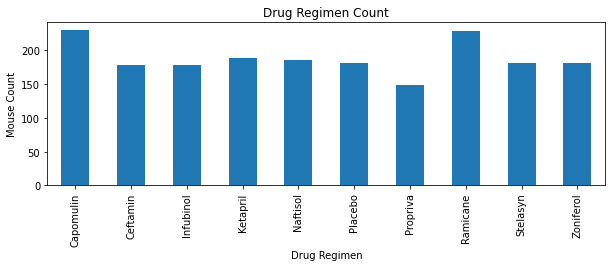

<Figure size 432x288 with 0 Axes>

In [13]:
# Use DataFrame.plot() in order to create a bar chart of the data
drug_regimen_and_measure.plot(kind="bar", figsize=(10,3),legend =False)

# Set a title for the chart
plt.title("Drug Regimen Count")
plt.ylabel("Mouse Count")

plt.show()
plt.tight_layout()

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#Set the x_axis to be the amount of the Data Regimen
x_axis = mouse_summary_df.index.tolist()

#Group by Drug Regime
#drug_group = (mouse_study_clean.groupby(["Drug Regimen"]))
#drug_count = drug_group["Mouse ID"].count().tolist()       
drug_count = (mouse_study_clean.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
drug_count


[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

Text(0, 0.5, 'Mouse Count')

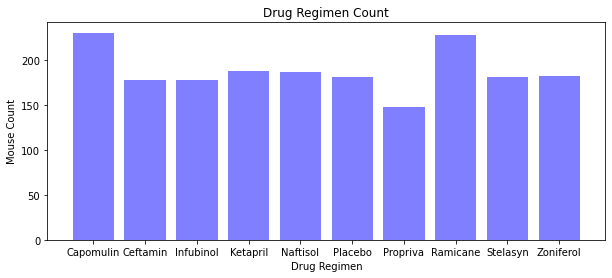

In [15]:
# Tell matplotlib that we will be making a bar chart

plt.figure(figsize=(10,4))
plt.bar(x_axis, drug_count, color='blue', alpha=0.5, align="center")

#Adding title and labels
plt.title("Drug Regimen Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Group by Gender

#Group by Sex and get count. Reset the index to remove the group by and add column back
#gender_data = pd.DataFrame(mouse_study_clean.groupby(["Sex"]).count()).reset_index()
#gender_data

gender_data = mouse_study_clean['Sex'].value_counts()
#gender_data

Text(0, 0.5, '')

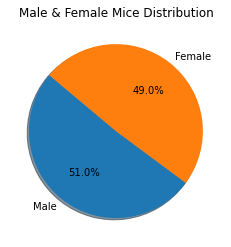

In [17]:
gender_data.plot(kind="pie", y = "Mouse ID", autopct='%1.1f%%',
              startangle=140, shadow=True, legend = False)

plt.title("Male & Female Mice Distribution")
plt.ylabel("")

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Females","Male"]
colors =["orange", "blue"]

#which section of the circle to detach
#explode = (0.1, 0)

#Get count of female and male mice
gender_count = (mouse_study_clean.groupby(["Sex"])["Mouse ID"].count()).tolist()
#gender_count

Text(0.5, 1.0, 'Male & Female Mice Distribution')

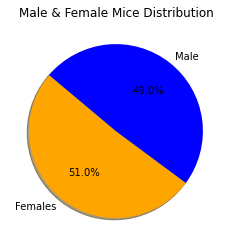

In [19]:
plt.pie(gender_data, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male & Female Mice Distribution")

## Quartiles, Outliers and Boxplots

In [20]:
mouse_study_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin')
drug_data = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'].isin(drug_list)]

#drug_data

# Start by getting the last (greatest) timepoint for each mouse

#Group by Mouse ID
drug_data_group = drug_data.groupby(drug_data["Mouse ID"])

#Find the max timepoint
max_tp = drug_data_group["Timepoint"].max()
#max_tp

In [22]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tp  = max_tp.reset_index()
max_tp_tumor_df = pd.merge(max_tp, mouse_study_clean, how="left", on=["Mouse ID", "Timepoint"])
max_tp_tumor_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [24]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []


In [25]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    drug_tumor_volume = max_tp_tumor_df['Tumor Volume (mm3)'].loc[max_tp_tumor_df['Drug Regimen'] == drug]
    # add subset 
    tumor_volume_data.append(drug_tumor_volume)
    # Determine outliers using upper and lower bounds
    quartiles = drug_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"For {drug}, the lower quartile is: {lowerq}")
    print(f"For {drug}, the upper quartile is: {upperq}")
    print(f"For {drug}, Interquartile Range (IQR) is {iqr}")
    print(f"For {drug}, the the median is: {quartiles[0.5]} ")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"For {drug}, values below {lower_bound} could be outliers")
    print(f"For {drug}, values above {upper_bound} could be outliers\n")
    
#tumor_volume_data
   

For Capomulin, the lower quartile is: 32.37735684
For Capomulin, the upper quartile is: 40.1592203
For Capomulin, Interquartile Range (IQR) is 7.781863460000004
For Capomulin, the the median is: 38.125164399999996 
For Capomulin, values below 20.70456164999999 could be outliers
For Capomulin, values above 51.83201549 could be outliers

For Ramicane, the lower quartile is: 31.56046955
For Ramicane, the upper quartile is: 40.65900627
For Ramicane, Interquartile Range (IQR) is 9.098536719999998
For Ramicane, the the median is: 36.56165229 
For Ramicane, values below 17.912664470000003 could be outliers
For Ramicane, values above 54.30681135 could be outliers

For Infubinol, the lower quartile is: 54.04860769
For Infubinol, the upper quartile is: 65.52574285
For Infubinol, Interquartile Range (IQR) is 11.477135160000003
For Infubinol, the the median is: 60.16518046 
For Infubinol, values below 36.83290494999999 could be outliers
For Infubinol, values above 82.74144559000001 could be outlie

In [26]:
#tumor_volume_data

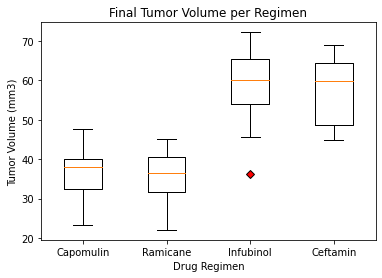

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# plot
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume per Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')
props = dict(markerfacecolor = 'red', marker = 'D')
ax.boxplot(tumor_volume_data, labels = drug_list, flierprops = props)
plt.show()

## Line and Scatter Plots

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.
#s185

#Get the data for mouse
mouse_data = mouse_study_clean[mouse_study_clean["Mouse ID"].isin(["s185"])]
mouse_data.head()

#Get the necessary columns for mouse
time_vs_tumor_data = mouse_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#time_vs_tumor_data



In [29]:
time_x_axis = time_vs_tumor_data["Timepoint"].tolist()
#time_x_axis

tumor_volume =  time_vs_tumor_data["Tumor Volume (mm3)"].tolist()
#tumor_volume

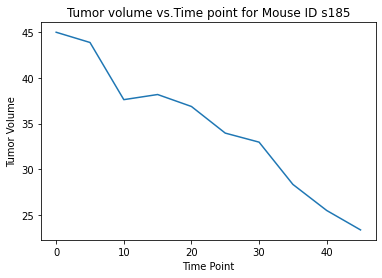

In [30]:
#Plotting line
plt.plot(time_x_axis, tumor_volume)

plt.title("Tumor volume vs.Time point for Mouse ID s185")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")

plt.show()

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#mouse weight

# average tumor volume

#Finding data for Capomulin
capomulin_data = mouse_study_clean[mouse_study_clean["Drug Regimen"].isin(["Capomulin"])]
capomulin_data

#Get the necessary columns for capomulin
capomulin_data_df = capomulin_data[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
capomulin_data_df                                  

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876
...,...,...,...
440,i557,24,47.685963
1452,r157,25,45.000000
1453,r157,25,45.597064
1454,r157,25,46.059608


In [32]:
 #Calculate average tumor volume for each mouse in the Capomulin regimen   
    
#Getting the mean from the a groupby of Weight and Tumor Volume
capomulin_grouped_weight = capomulin_data.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean()
#capomulin_grouped_weight

#Creating the Data Frame
capomulin_grouped_weight_df = pd.DataFrame(capomulin_grouped_weight).reset_index()
#capomulin_grouped_weight_df

In [33]:
weight_x_axis = capomulin_grouped_weight_df["Weight (g)"].tolist()
#weight_x_axis

avg_volume =  capomulin_grouped_weight_df["Tumor Volume (mm3)"].tolist()
#avg_volume

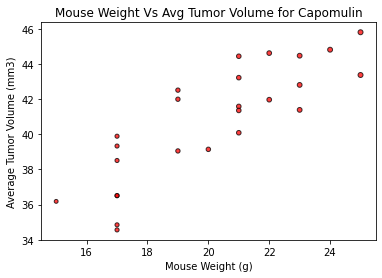

<Figure size 576x576 with 0 Axes>

In [34]:
plt.scatter(weight_x_axis, avg_volume, marker="o", facecolors="red", edgecolors="black",
            s=weight_x_axis, alpha=0.75)
#Add labels
# mouse weight versus average tumor volume for the Capomulin treatment regimen.
plt.title("Mouse Weight Vs Avg Tumor Volume for Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.figure(figsize=(8,8))

plt.show()

## Correlation and Regression

In [35]:
# Calculate the correlation coefficient
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = capomulin_grouped_weight_df.iloc[:,1]
avg_tumor = capomulin_grouped_weight_df.iloc[:,2]
correlation = st.pearsonr(mouse_weight,avg_tumor)

print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


In [36]:
#Creating X & Y values
x_values = mouse_weight
y_values = avg_tumor

#Creating the linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

#finding regression by x values times the slope and intercept
regress_values = x_values * slope + intercept

#Creating the line equation
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))


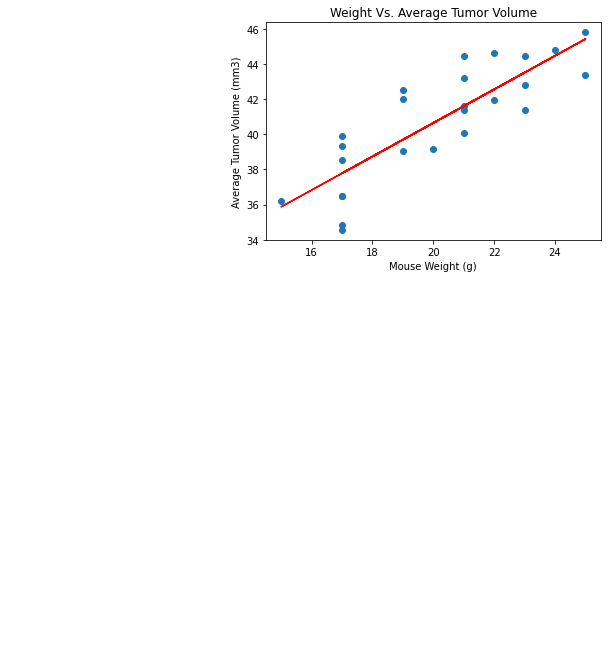

<Figure size 576x576 with 0 Axes>

In [37]:
#PLotting the Scatter
plt.scatter(x_values,y_values)

#PLotting the line
plt.plot(x_values,regress_values,"r-")

#making the line red
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Adding labels
plt.title("Weight Vs. Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.figure(figsize=(8,8))
plt.show()